https://finance.yahoo.com/calendar/earnings/?day=2023-12-12
Options data for CASY:
Average IV for Calls: 0.10658671648629996
Average IV for Puts: 0.09621815949401856
Total Call Volume: 390.0
Total Call open interest: 24
Total Call engagement: 414.0
Total Put Volume: 243.0
Total Put open interest: 46
Total Put engagement: 289.0
Number of ITM Call Options: 12
Number of ITM Put Options: 21


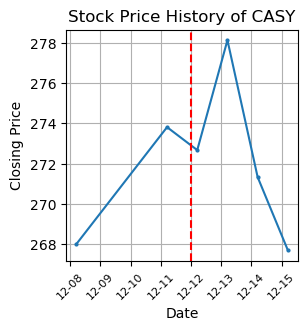

Options data for JCI:
Average IV for Calls: 0.2170355183753216
Average IV for Puts: 0.1119703765233594
Total Call Volume: 5714.0
Total Call open interest: 2015
Total Call engagement: 7729.0
Total Put Volume: 3036.0
Total Put open interest: 542
Total Put engagement: 3578.0
Number of ITM Call Options: 46
Number of ITM Put Options: 55


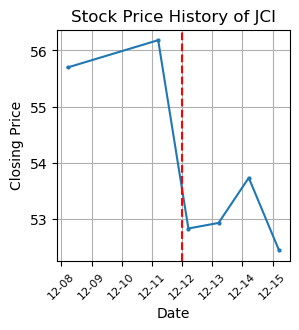

Options data for MDRX:
Average IV for Calls: 0.3363479009399414
Average IV for Puts: 0.12051660742187499
Total Call Volume: 184.0
Total Call open interest: 23
Total Call engagement: 207.0
Total Put Volume: 1043.0
Total Put open interest: 7
Total Put engagement: 1050.0
Number of ITM Call Options: 7
Number of ITM Put Options: 10


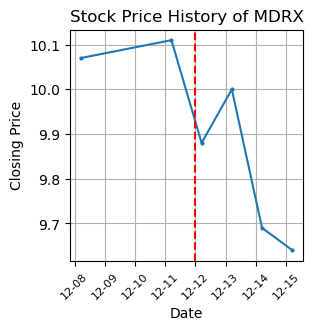

Options data for MDRX:
Average IV for Calls: 0.3363479009399414
Average IV for Puts: 0.12051660742187499
Total Call Volume: 184.0
Total Call open interest: 23
Total Call engagement: 207.0
Total Put Volume: 1043.0
Total Put open interest: 7
Total Put engagement: 1050.0
Number of ITM Call Options: 7
Number of ITM Put Options: 10


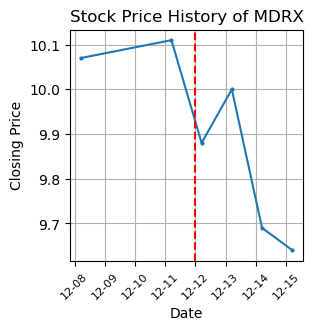

Options data for EPIX:
Average IV for Calls: 0.19418178955078125
Average IV for Puts: 0.42383496419270833
Total Call Volume: 253.0
Total Call open interest: 165
Total Call engagement: 418.0
Total Put Volume: 41.0
Total Put open interest: 7
Total Put engagement: 48.0
Number of ITM Call Options: 5
Number of ITM Put Options: 2


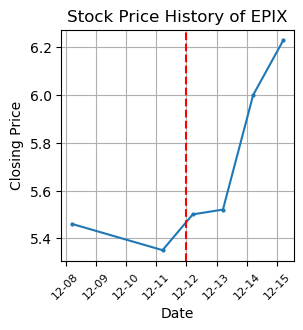

Options data for CSBR:
Average IV for Calls: 0.8424540505642363
Average IV for Puts: 0.5188884033203126
Total Call Volume: 15.0
Total Call open interest: 153
Total Call engagement: 168.0
Total Put Volume: 4.0
Total Put open interest: 11
Total Put engagement: 15.0
Number of ITM Call Options: 0
Number of ITM Put Options: 5


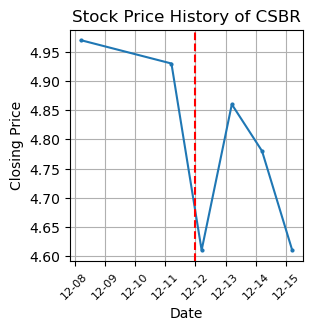

Options data for MAMA:
Average IV for Calls: 0.18229984375
Average IV for Puts: nan
Total Call Volume: 87.0
Total Call open interest: 3
Total Call engagement: 90.0
Total Put Volume: 45.0
Total Put open interest: 22.0
Total Put engagement: 67.0
Number of ITM Call Options: 3
Number of ITM Put Options: 3


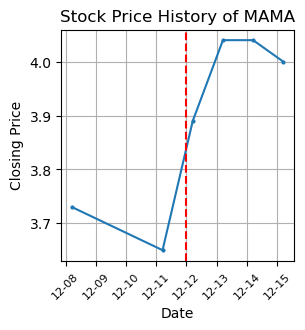

Options data for SST:
Average IV for Calls: 1.2740927022569446
Average IV for Puts: nan
Total Call Volume: 425.0
Total Call open interest: 17019
Total Call engagement: 17444.0
Total Put Volume: 67.0
Total Put open interest: 3356.0
Total Put engagement: 3423.0
Number of ITM Call Options: 0
Number of ITM Put Options: 20


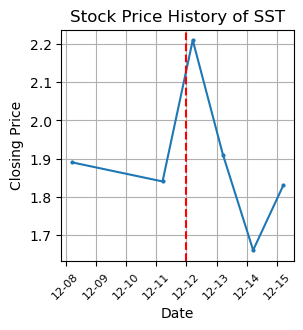

Options data for SST:
Average IV for Calls: 1.2740927022569446
Average IV for Puts: nan
Total Call Volume: 425.0
Total Call open interest: 17019
Total Call engagement: 17444.0
Total Put Volume: 67.0
Total Put open interest: 3356.0
Total Put engagement: 3423.0
Number of ITM Call Options: 0
Number of ITM Put Options: 20


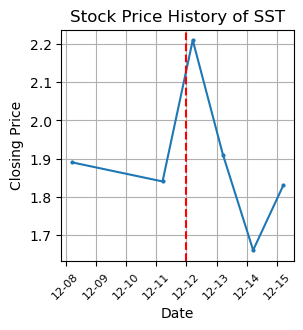

Options data for EMKR:
Average IV for Calls: 0.500005
Average IV for Puts: 1.0000000000000003e-05
Total Call Volume: 67.0
Total Call open interest: 0
Total Call engagement: 67.0
Total Put Volume: 1.0
Total Put open interest: 0
Total Put engagement: 1.0
Number of ITM Call Options: 0
Number of ITM Put Options: 3


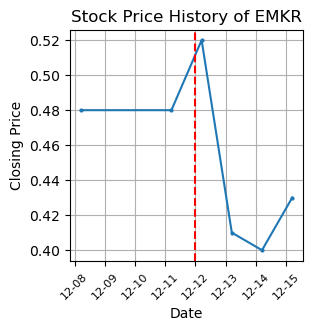

Options data for FRCB:
Average IV for Calls: 4.838602105511676
Average IV for Puts: 0.1574095739850427
Total Call Volume: 518
Total Call open interest: 53793
Total Call engagement: 54311
Total Put Volume: 221.0
Total Put open interest: 1356
Total Put engagement: 1577.0
Number of ITM Call Options: 0
Number of ITM Put Options: 40


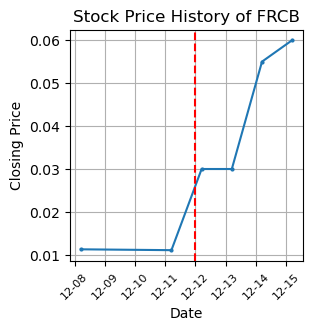

Options data for IRNTQ:
Average IV for Calls: 0.02389510155316607
Average IV for Puts: nan
Total Call Volume: 5.0
Total Call open interest: 1156.0
Total Call engagement: 1161.0
Total Put Volume: 0.0
Total Put open interest: 0.0
Total Put engagement: 0.0
Number of ITM Call Options: 0
Number of ITM Put Options: 25


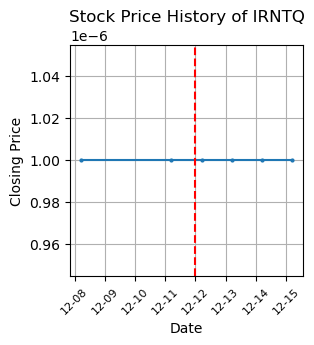

In [1]:
from datetime import datetime, timedelta
from utils import *  
import numpy as np

# Call the function and store the result
day = '2023-12-12'
ticker_data_sorted = scrape_and_process_yahoo_finance_data(day)

# Set the time frame
release_date = datetime.strptime(day, '%Y-%m-%d')
end_date = release_date + timedelta(days=4)
start_date = release_date - timedelta(days=4)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']

    # Use the function from utils.py to analyze stock options
    options_metrics = analyze_stock_options(ticker)

    if options_metrics['total_itm_calls'] == 0 and options_metrics['total_itm_puts'] == 0:
        continue

    # Get Reality
    reality = analyze_stock_performance_post_earnings(ticker, release_date, start_date, end_date)

    # Print 
    print_options_data(ticker, options_metrics)

    # Call the plot_stock_history method
    plot_stock_history(ticker, start_date, end_date, release_date=release_date)
    
    # Filtered tickers
    filtered_tickers.append(ticker)
